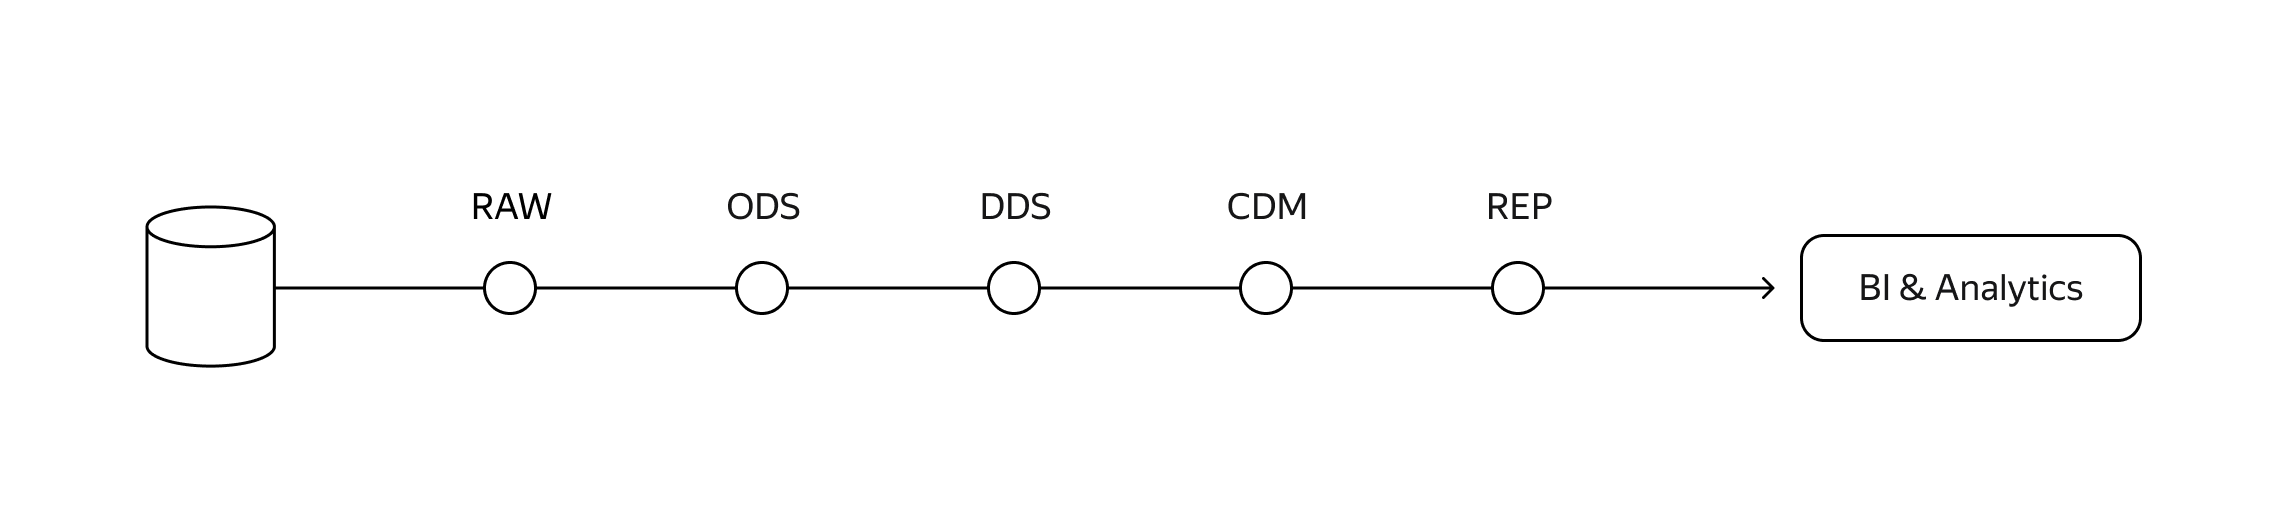

- Raw слой сырых данных, исходные данные сохраняются как есть, чтобы можно было делать дополнительные етл без перевыгрузки
- ODS (operational data store) - хранилище операционных данных. Сырые данные очищаются от тех информации (даты обновления строк, изменения полей и тд) Состояние данных близко к источнику
- DDS (detail data store) - хранилище детализированных данных. Добавление справочников, нормализация, создание ключей связей. Удобно использовать информацию из разных источников.
- CDM (common data marts) - общие витрины данных. Создаются витрины с агрегатами и показателями, с детализацией вплоть до пользователей. Данные поступаю по регламенту из DDS. Могут переиспользоваться в разных REP
- REP (reporting) - отчетность. Данные направляются в BI или автоматизированные боты. Данные подготовлены для конкретной задачи

Некоторые слои могут отсутсвовать

Обычная схема:
Источник данных -> Слой Raw -> Слой ODS -> Слой CDM

In [1]:
# Пример подключения к БД

import psycopg2
import pandas as pd
import numpy as np

conn = psycopg2.connect("host='localhost' port='15432' dbname='de' user='jovyan' password='jovyan'")
# переменная conn создаёт подключение к БД
cur = conn.cursor()  

In [ ]:
# Асинхронное
import requests
import time

api_host = 'https://d5dg1j9kt695d30blp03.apigw.yandexcloud.net'
nickname = 'AlexanderZhukov'
api_key = '5f55e6c0-e9e5-4a9c-b313-63c01fc31460'
cohort = 12

generate_report_response = requests.post(
    f"{api_host}/generate_report", # точка входа
    headers={
    "X-API-KEY": api_key, # ключ API
    "X-Nickname": nickname, # авторизационные данные
    "X-Cohort": str(cohort) # авторизационные данные
    }
).json()
task_id = generate_report_response["task_id"]
print(generate_report_response)

time.sleep(60)

get_report_response = requests.get(
    f"{api_host}/get_report?task_id={task_id}",
    headers={
    "X-API-KEY": api_key,
    "X-Nickname": nickname,
    "X-Cohort": str(cohort)
    }
).json()

print(get_report_response)

In [ ]:
# Урок 9

In [29]:
insert_uol = "insert into stage.user_order_log (id, date_time, city_id, city_name, customer_id, first_name, last_name, item_id, item_name, quantity, payment_amount) VALUES {insert_statement};"

In [48]:
user_orders_log = pd.read_csv("stage/user_order_log.csv", index_col=0)

In [49]:
user_orders_log.drop(columns=["uniq_id"], inplace=True)

In [67]:
def insert_into_db(df, insert_statement):
    current = 0
    step = int(df.shape[0] / 100)
    while current < df.shape[0]:
        print(current)
        insert_str =  str([tuple(x) for x in df.loc[step:step + step].to_numpy()])[1:-1]
        cur.execute(insert_statement.replace('{insert_statement}', insert_str))
        conn.commit()
        current += step + 1

In [68]:
insert_uol = "insert into stage.user_order_log (id, date_time, city_id, city_name, customer_id, first_name, last_name, item_id, item_name, quantity, payment_amount) VALUES {insert_statement};"

In [71]:
insert_into_db(user_orders_log, insert_uol)

0
228
456
684
912
1140
1368
1596
1824
2052
2280
2508
2736
2964
3192
3420
3648
3876
4104
4332
4560
4788
5016
5244
5472
5700
5928
6156
6384
6612
6840
7068
7296
7524
7752
7980
8208
8436
8664
8892
9120
9348
9576
9804
10032
10260
10488
10716
10944
11172
11400
11628
11856
12084
12312
12540
12768
12996
13224
13452
13680
13908
14136
14364
14592
14820
15048
15276
15504
15732
15960
16188
16416
16644
16872
17100
17328
17556
17784
18012
18240
18468
18696
18924
19152
19380
19608
19836
20064
20292
20520
20748
20976
21204
21432
21660
21888
22116
22344
22572


In [128]:
customer_research = pd.read_csv("stage/customer_research.csv", index_col=0)

In [129]:
customer_research.head(10)

,date_id,category_id,geo_id,sales_qty,sales_amt
0,2023-02-25T00:00:00,1001,1,5,4745
1,2023-02-25T00:00:00,1001,2,2,1898
2,2023-02-25T00:00:00,1001,3,2,1898
3,2023-02-25T00:00:00,1002,1,6,5694
4,2023-02-25T00:00:00,1002,2,9,8541
5,2023-02-25T00:00:00,1002,3,9,8541
6,2023-02-25T00:00:00,1003,1,6,5694
7,2023-02-25T00:00:00,1003,2,8,7592
8,2023-02-25T00:00:00,1003,3,9,8541
9,2023-02-25T00:00:00,1004,1,3,2847


In [107]:
insert_customer = "insert into stage.customer_research (date_id, category_id, geo_id, sales_qty, sales_amt) VALUES {insert_statement};"

In [109]:
insert_into_db(customer_research, insert_customer)

0
7
14
21
28
35
42
49
56
63
70
77
84
91
98
105
112
119
126
133
140
147
154
161
168
175
182
189
196
203
210
217
224
231
238
245
252
259
266
273
280
287
294
301
308
315
322
329
336
343
350
357
364
371
378
385
392
399
406
413
420
427
434
441
448
455
462
469
476
483
490
497
504
511
518
525
532
539
546
553
560
567
574
581
588
595
602
609
616
623
630
637
644
651
658
665
672
679
686


In [143]:
user_activity_log = pd.read_csv("stage/user_activity_log.csv", index_col=0)

In [144]:
user_activity_log.drop(columns=["id", "uniq_id"], inplace=True)
user_activity_log

,date_time,action_id,customer_id,quantity
0,2023-02-25T00:00:00,3,501,0
1,2023-02-25T00:00:00,3,891,14
2,2023-02-25T00:00:00,1,920,6
3,2023-02-25T00:00:00,3,471,14
4,2023-02-25T00:00:00,1,470,16
...,...,...,...,...
192,2023-03-19T00:00:00,3,980,19
193,2023-03-19T00:00:00,1,370,8
194,2023-03-19T00:00:00,1,570,21
195,2023-03-19T00:00:00,2,770,4


In [146]:
insert_ual = "insert into stage.user_activity_log (date_time, action_id, customer_id, quantity) VALUES {insert_statement};"

In [147]:
insert_into_db(user_activity_log, insert_ual)

0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88
90
92
94
96
98
100
102
104
106
108
110
112
114
116
118
120
122
124
126
128
130
132
134
136
138
140
142
144
146
148
150
152
154
156
158
160
162
164
166
168
170
172
174
176
178
180
182
184
186
188
190
192
194
196


In [145]:
conn.rollback()

In [ ]:
user_orders_log